In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np

In [ ]:
# 국가명 -> 국가코드로 변경
# https://towardsdatascience.com/matching-country-information-in-python-7e1928583644
# pip install pycountry
import pycountry

def findCountryNumeric (country_name):
    try:
        return pycountry.countries.get(name=country_name).numeric
    except:
        return ("not founded!")
df['country_numeric'] = df.apply(lambda row: findCountryNumeric(row.Country) , axis = 1)
df['country_numeric']
df['country_numeric']= df['country_numeric'].astype("category")

df.to_csv('test0810_2.csv')
# 나머진 구글링해서 csv에 넣기

In [12]:
df= pd.read_csv('test0810_2.csv', header=0)
df.rename(columns={"Country name": "Country", "year":"Year","Life Ladder":"Happiness_Score", "Log GDP per capita":"Economy", 
                  "Social support":"Society" , "Healthy life expectancy at birth":"Health", "Freedom to make life choices":"Freedom",
                  "alcohol disorders":"Alcohol", "suicide rates":"Suicide", "Perceptions of corruption":"Corruption", "DALYs Mental disorders":"Mental"}, inplace=True)
df['Year']= df['Year'].astype("category")
df['country_numeric']= df['country_numeric'].astype("category")
model = ols("Happiness_Score~ country_numeric+  Economy  + Generosity+ Society + Health + Freedom + Corruption + schooling+ Alcohol+ Suicide + Obesity+ Fertility + Mental", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     98.27
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:35:50   Log-Likelihood:                -437.50
No. Observations:                1849   AIC:                             1207.
Df Residuals:                    1683   BIC:                             2124.
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3447      0.158     -2.186      0.029      -0.654      -0.035
country_numeric[T.8]       0.3986      0.209      1.908      0.057      -0.011       0.809
country_numeric[T.12]      0.6612      0.206      3.212      0.001       0.257       1.065
country_numeric[T.24]     -0.8536      0.223     -3.829      0.000      -1.291      -0.416
country_numeric[T.31]      0.2309      0.220      1.051      0.293      -0.200       0.662
country_numeric[T.32]      0.6076      0.210      2.896      0.004       0.196       1.019
country_numeric[T.36]      0.7055      0.256      2.752      0.006       0.203       1.208
country_numeric[T.40]      0.6291      0.241      2.606      0.009       0.156       1.103
country_numeric[T.48]      0.0109      0.317      0.034      0.973      -0.610       0.632
country_numeric[T.50]      0.6409      0.203      3.161      0.002       0.243       1.038
country_numeric[T.51]      0.2975      0.227      1.309      0.191      -0.148       0.743
country_numeric[T.56]      0.4144      0.250      1.657      0.098      -0.076       0.905
country_numeric[T.64]     -0.4420      0.286     -1.547      0.122      -1.003       0.118
country_numeric[T.70]      0.5833      0.230      2.536      0.011       0.132       1.034
country_numeric[T.72]     -1.4987      0.226     -6.618      0.000      -1.943      -1.055
country_numeric[T.76]      1.1573      0.205      5.651      0.000       0.756       1.559
country_numeric[T.84]      1.6543      0.292      5.657      0.000       1.081       2.228
country_numeric[T.100]    -0.3733      0.274     -1.363      0.173      -0.910       0.164
country_numeric[T.104]    -0.4228      0.221     -1.911      0.056      -0.857       0.011
country_numeric[T.108]     0.6484      0.205      3.165      0.002       0.247       1.050
country_numeric[T.112]     0.9330      0.323      2.887      0.004       0.299       1.567
country_numeric[T.113]    -0.2868      0.299     -0.959      0.338      -0.873       0.300
country_numeric[T.116]    -0.1960      0.197     -0.995      0.320      -0.582       0.190
country_numeric[T.120]     0.1753      0.155      1.130      0.259      -0.129       0.480
country_numeric[T.124]     0.8355      0.241      3.462      0.001       0.362       1.309
country_numeric[T.126]     0.0846      0.227      0.372      0.710      -0.361       0.530
country_numeric[T.138]    -0.0935      0.190     -0.491      0.624      -0.467       0.280
country_numeric[T.140]     0.3653      0.202      1.808      0.071      -0.031       0.762
country_numeric[T.144]    -0.4680      0.299     -1.566      0.118      -1.054       0.118
country_numeric[T.148]    -0.0527      0.148     -0.356      0.722      -0.343       0.238
country_numeric[T.152]     0.8593      0.222      3.870      0.000       0.424  

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


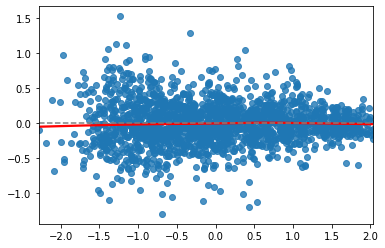

In [13]:
# 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
fitted= model.predict(df)
residual= df['Happiness_Score'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')


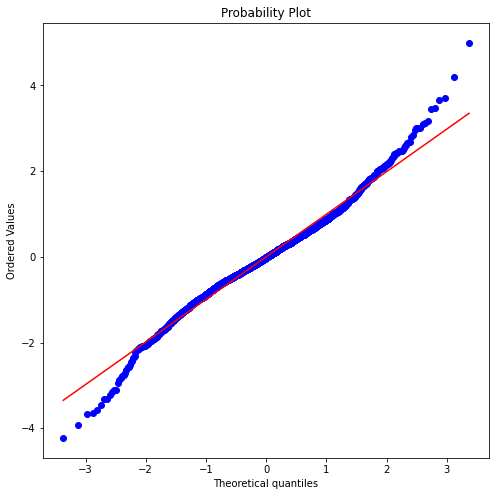

In [14]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [15]:
scipy.stats.shapiro(residual) # 문제 발생

(0.9845649600028992, 3.174747248944898e-13)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

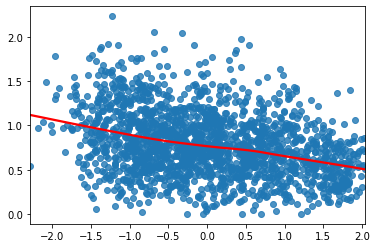

In [16]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})